## Bachelor Nation -  Analyze Tweets

#### Prep

In [1]:
#- set working directory
import os
project_root = '/Users/kgedney/Documents/projects/bachelor-twitter'
os.chdir(project_root)

In [2]:
#- install packages
import sys
import json
import numpy as np
import pandas as pd
from datetime import datetime

from matplotlib import pyplot as plt

In [3]:
# load data from json lines file
df = pd.read_json('data.jl', lines=True)

In [4]:
df.shape

(49685, 36)

#### Tweets Over Time

In [5]:
# convert time zone to EST by just subtracting 5 hours
# twitter defaults to UTC time so switch to EST
df['created_at_EST'] = df['created_at'] - np.timedelta64(5, 'h')

In [6]:
# set time as index

In [12]:
# create nicely named column for plotting
df['time'] = df['created_at_EST']
df = df.set_index('time', drop=False)

In [13]:
df.time.head()

time
2019-02-25 18:31:50   2019-02-25 18:31:50
2019-02-25 18:31:53   2019-02-25 18:31:53
2019-02-25 18:31:54   2019-02-25 18:31:54
2019-02-25 18:31:56   2019-02-25 18:31:56
2019-02-25 18:32:04   2019-02-25 18:32:04
Name: time, dtype: datetime64[ns]

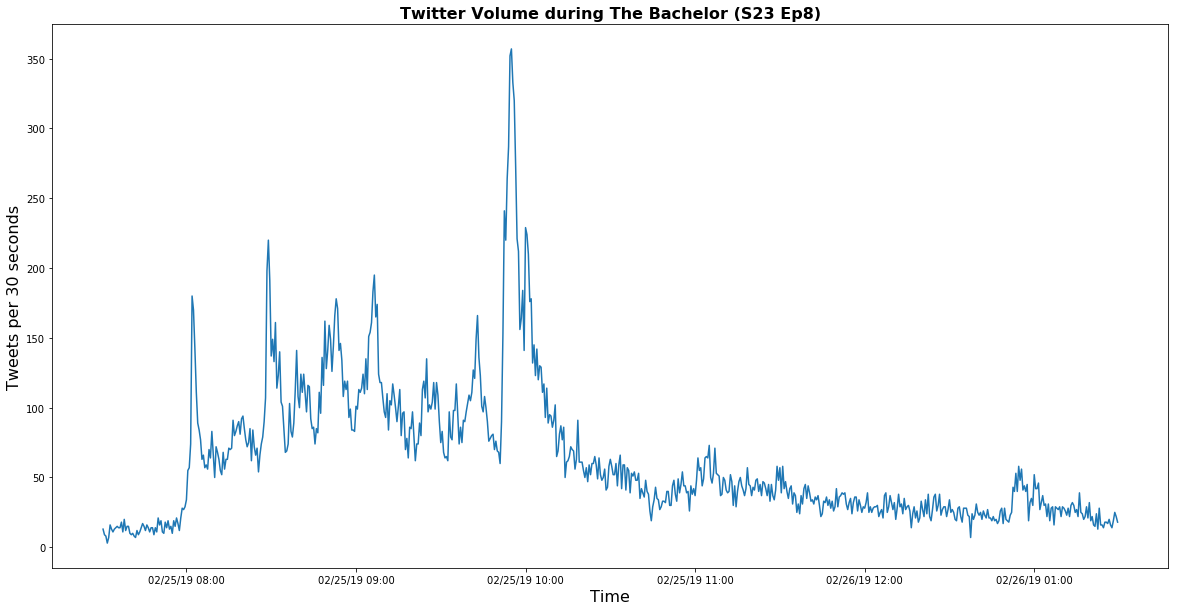

In [148]:
import matplotlib.dates as mdates

def plot_time(df):
    # create bins by time
    time_hist = df.time.groupby(pd.Grouper(freq='30s')).count()

    # filter to be between 7:30p ET and 1:30a ET
    sub = time_hist[(time_hist.index > '2019-02-25 19:30:00') & (time_hist.index < '2019-02-26 01:30:00')]

    # specify plot
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(sub.index, sub.values)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %I:%M'))
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Tweets per 30 seconds', fontsize=16)
    plt.title('Twitter Volume during The Bachelor (S23 Ep8)', fontweight="bold", fontsize=16)

plot_time(df)
plt.show()

#### Text Analysis

In [97]:
# subset on time
df = df[(df.created_at_EST > '2019-02-25 19:30:00') & (df.created_at_EST < '2019-02-26 01:30:00')]

In [101]:
# subset on hastags
df.text.head()

time
2019-02-25 19:30:06    ready for hometowns tonight #TheBachelor https...
2019-02-25 19:30:08    @oliviacarrroll @colton Good one👏🏼 https://t.c...
2019-02-25 19:30:10    RT @sarahh238: Lowkey upset Hannah B went home...
2019-02-25 19:30:11    Hi hoes I tweeted on Saturday while drunk and ...
2019-02-25 19:30:11                        @colton no. we want the fence
Name: text, dtype: object

In [107]:
df.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,created_at_EST,time
time,,,,,,,,,,,,,,,,,,,,,
2019-02-25 19:30:06,NaN,None,2019-02-26 00:30:06,"[0, 40]","{'hashtags': [{'text': 'TheBachelor', 'indices...","{'media': [{'id': 1100191231303475201, 'id_str...",NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",ready for hometowns tonight #TheBachelor https...,2019-02-26 00:30:06.390,False,"{'id': 1038883466320994304, 'id_str': '1038883...",2019-02-25 19:30:06,2019-02-25 19:30:06


#### - Top Hashtags

In [139]:
# column called entities is a dictionary of data.. including hashtags
# so convert to be its own list so we have a hastags columns
df['hashtags'] = [[xx['text'] for xx in x['hashtags']] for x in df['entities'].tolist()]

In [137]:
# top hashtags
pd.value_counts(np.hstack(df.hashtags.values)).head(25)

TheBachelor        19671
thebachelor         2513
BachelorNation      2493
TheBachelorette      560
Bachelor             506
BachelorMonday       376
bachelor             349
Colton               231
bachelornation       221
TheBachlor           212
Thebachelor          157
theBachelor          153
hometowns            122
Cassie                86
TheBatchelor          80
HannahG               79
Tayshia               70
Hometowns             65
jual                  62
Batista               61
Pell                  61
bachelor2019          55
TeamCassie            51
LioRush               51
colton                47
dtype: int64

#### - Mentions by Name

In [198]:
cassie_df  = df[df.text.apply(lambda x: 'cassie' in x.lower())]
caelynn_df = df[df.text.apply(lambda x: 'caelynn' in x.lower())]
tayshia_df = df[df.text.apply(lambda x: 'tayshia' in x.lower())]
hannah_df  = df[df.text.apply(lambda x: 'hannah' in x.lower())]
colton_df  = df[df.text.apply(lambda x: 'colton' in x.lower())]

In [201]:
# overall counts
print('cassie: ', cassie_df.shape[0])
print('caelynn: ', caelynn_df.shape[0])
print('tayshia: ', tayshia_df.shape[0])
print('hannah: ', hannah_df.shape[0])

cassie:  5744
caelynn:  3453
tayshia:  3404
hannah:  2338


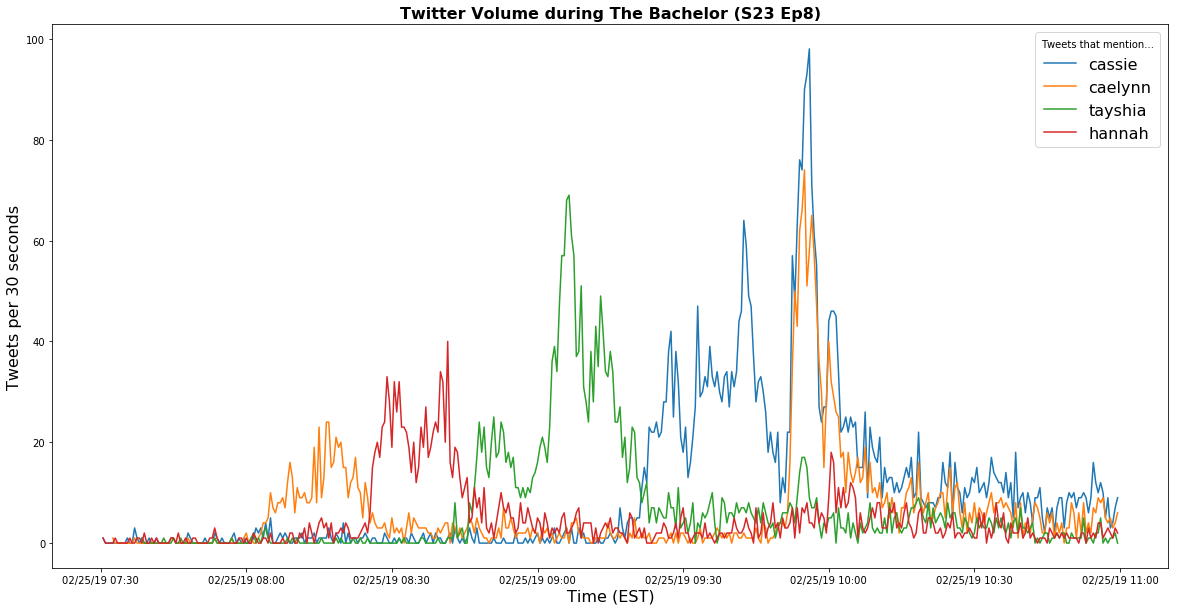

In [199]:
# over time
def plot_times(dfs):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for label, df in dfs:
        # create bins by time
        time_hist = df.time.groupby(pd.Grouper(freq='30s')).count()
        # filter to be between 7:30p ET and 1:30a ET
        sub = time_hist[(time_hist.index > '2019-02-25 19:30:00') & (time_hist.index < '2019-02-25 23:00:00')]
        # specify plot
        ax.plot(sub.index, sub.values, label=label)
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %I:%M'))
    ax.set_xlabel('Time (EST)', fontsize=16)
    ax.set_ylabel('Tweets per 30 seconds', fontsize=16)
    plt.title('Twitter Volume during The Bachelor (S23 Ep8)', fontweight="bold", fontsize=16)

data = [
#     ('total', df),
    ('cassie', cassie_df),
    ('caelynn', caelynn_df),
    ('tayshia', tayshia_df),
    ('hannah', hannah_df),
#     ('colton', colton_df)
]
plot_times(data)
plt.legend(fontsize=16, title='Tweets that mention...')
plt.show()

In [170]:
# check sample size
print('count', np.hstack([
    cassie_df.id.values,
    caelynn_df.id.values,
    tayshia_df.id.values,
    hannah_df.id.values,
]).shape)

print('unique', np.unique(np.hstack([
    cassie_df.id.values,
    caelynn_df.id.values,
    tayshia_df.id.values,
    hannah_df.id.values,
])).shape)

count (14939,)
unique (12960,)


In [14]:
data.user.iloc[0]

data['user__screen_name'] = data.user.apply(lambda x: x['screen_name'])
data['user__location']    = data.user.apply(lambda x: x['location'])
data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,user__screen_name,user__location
0,NaN,NaN,2019-02-25 23:31:50,"[21, 42]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@colton @BachelorABC Cassie or Caelynn !!!,2019-02-25 23:31:50.931,False,"{'id': 715980219383996416, 'id_str': '71598021...",nicholemarie122,"Rockville, CT"
1,NaN,NaN,2019-02-25 23:31:53,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Un-freaking-believable.,2019-02-25 23:31:53.701,False,"{'id': 4591899755, 'id_str': '4591899755', 'na...",maxbaker_15,None
2,NaN,NaN,2019-02-25 23:31:54,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Hometowns today ❣️❣️,2019-02-25 23:31:54.416,False,"{'id': 360440805, 'id_str': '360440805', 'name...",claw_uh_dia,None
3,NaN,NaN,2019-02-25 23:31:56,NaN,"{'hashtags': [{'text': 'TheBachelor', 'indices...",NaN,NaN,0,False,low,...,0,False,{'created_at': 'Mon Feb 25 22:16:39 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @colton: Who is ready to JUMP into hometown...,2019-02-25 23:31:56.251,False,"{'id': 2825761515, 'id_str': '2825761515', 'na...",HeyItsVladis,None
4,NaN,NaN,2019-02-25 23:32:04,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': 'I am old enough to have devoted...,0,False,low,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I am old enough to have devoted a summer of my...,2019-02-25 23:32:04.976,True,"{'id': 1612067526, 'id_str': '1612067526', 'na...",bryanbehar,"Studio City, CA"


In [ ]:
# status.text -> text of the tweet
# status.user.location -> name of location
# status.coordinates -> geolocation in lat/long
# status.created_at -> timsestamp

In [ ]:
#                 return True
#         text      = status.text
#         loc       = status.user.location
#         coords    = status.coordinates
#         timestamp = status.created_at
   

#### Tweets by Platform

In [61]:
# clean up source and plot results

from bs4 import BeautifulSoup

def clean_source(x):
    return BeautifulSoup(x, "lxml").text

df['short_source'] = df.source.apply(clean_source)
df['short_source'].value_counts()

Twitter for iPhone              22240
Twitter for Android              2823
Twitter Web Client               1880
Twitter Web App                   696
Twitter for iPad                  301
TweetDeck                         128
Echofon                            49
Sidecastr                          40
Tweetbot for iΟS                   24
Facebook                           18
Instagram                          14
Tweetlogix                         13
WordPress.com                      13
IFTTT                              11
TweetCaster for Android            11
Hootsuite Inc.                      7
Buffer                              6
SocialFlow                          5
Microsoft PowerApps and Flow        4
NuevoATENTORNOI                     4
PFT Botmenter                       3
Google                              3
twittbot.net                        2
TrendZerk                           2
artmaps-follow                      2
SocialNewsDesk                      2
Sprout Socia

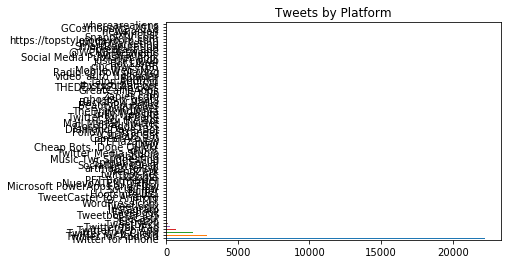

In [62]:
from matplotlib import pyplot as plt
df.short_source.value_counts().plot.barh()
plt.title('Tweets by Platform')
plt.show()

#### Tweets by Contenstant